In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [109]:
weather_data = pd.read_csv('/kaggle/input/australian-weather-dataset/weatherAUS.csv')

# link to the dataset: https://www.kaggle.com/datasets/vasifasad/australian-weather-dataset

In [30]:
df = weather_data.copy()

## 1. Explore the dataset

In [31]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [32]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

- Date - The date of observation 
- Location - The common name of the location of the weather station 
- MinTemp - The minimum temperature in degrees celsius 
- MaxTemp - The maximum temperature in degrees celsius 
- Rainfall - The amount of rainfall recorded for the day in mm 
- Evaporation - The so-called Class A pan evaporation (mm) in the 24 hours to 9am 
- Sunshine - The number of hours of bright sunshine in the day. 
- WindGustDir - The direction of the strongest wind gust in the 24 hours to midnight 
- WindGustSpeed - The speed (km/h) of the strongest wind gust in the 24 hours to midnight 
- WindDir9am - Direction of the wind at 9am 
- WindDir3pm - Direction of the wind at 3pm 
- WindSpeed9am - Wind speed (km/hr) averaged over 10 minutes prior to 9am 
- WindSpeed3pm - Wind speed (km/hr) averaged over 10 minutes prior to 3pm 
- Humidity9am - Humidity (percent) at 9am 
- Humidity3pm - Humidity (percent) at 3pm 
- Pressure9am - Atmospheric pressure (hpa) reduced to mean sea level at 9am 
- Pressure3pm - Atmospheric pressure (hpa) reduced to mean sea level at 3pm 
- Cloud9am - Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast. 
- Cloud3pm - Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a 
description of the values 
- Temp9am - Temperature (degrees C) at 9am 
- Temp3pm - Temperature (degrees C) at 3pm 
- RainToday - Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0 
- RainTomorrow - The amount of next day rain in mm. Used to create response variable 
- RainTomorrow. A kind of measure of the "risk"

## 2. Check the missing values

In [33]:
missing_df = pd.DataFrame({
    'Feature': df.columns,
    'Missing': df.isnull().sum().values,
    'MissingPercent': (df.isnull().sum().values / len(df)) * 100
})

In [34]:
missing_df = missing_df.sort_values(by='MissingPercent', ascending=False).reset_index(drop=True)

In [35]:
missing_df

,Feature,Missing,MissingPercent
0,Sunshine,69835,48.009762
1,Evaporation,62790,43.166506
2,Cloud3pm,59358,40.807095
3,Cloud9am,55888,38.421559
4,Pressure9am,15065,10.356799
5,Pressure3pm,15028,10.331363
6,WindDir9am,10566,7.263853
7,WindGustDir,10326,7.098859
8,WindGustSpeed,10263,7.055548
9,Humidity3pm,4507,3.098446


What should we do here? 

- Drop the columns with more than 20% of missing.
- Visualize the distributions of remaining columns.
- If the columns is not too much skewed (or does not have many outliers), then fill nulls with mean values. Otherwise, fill nulls with median values.
- In the categorical columns, fill the missing values with mode.

In [36]:
df = df.drop(['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am'], axis = 1)

In [37]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

### Check distribution and outliers

In [38]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm'],
      dtype='object')

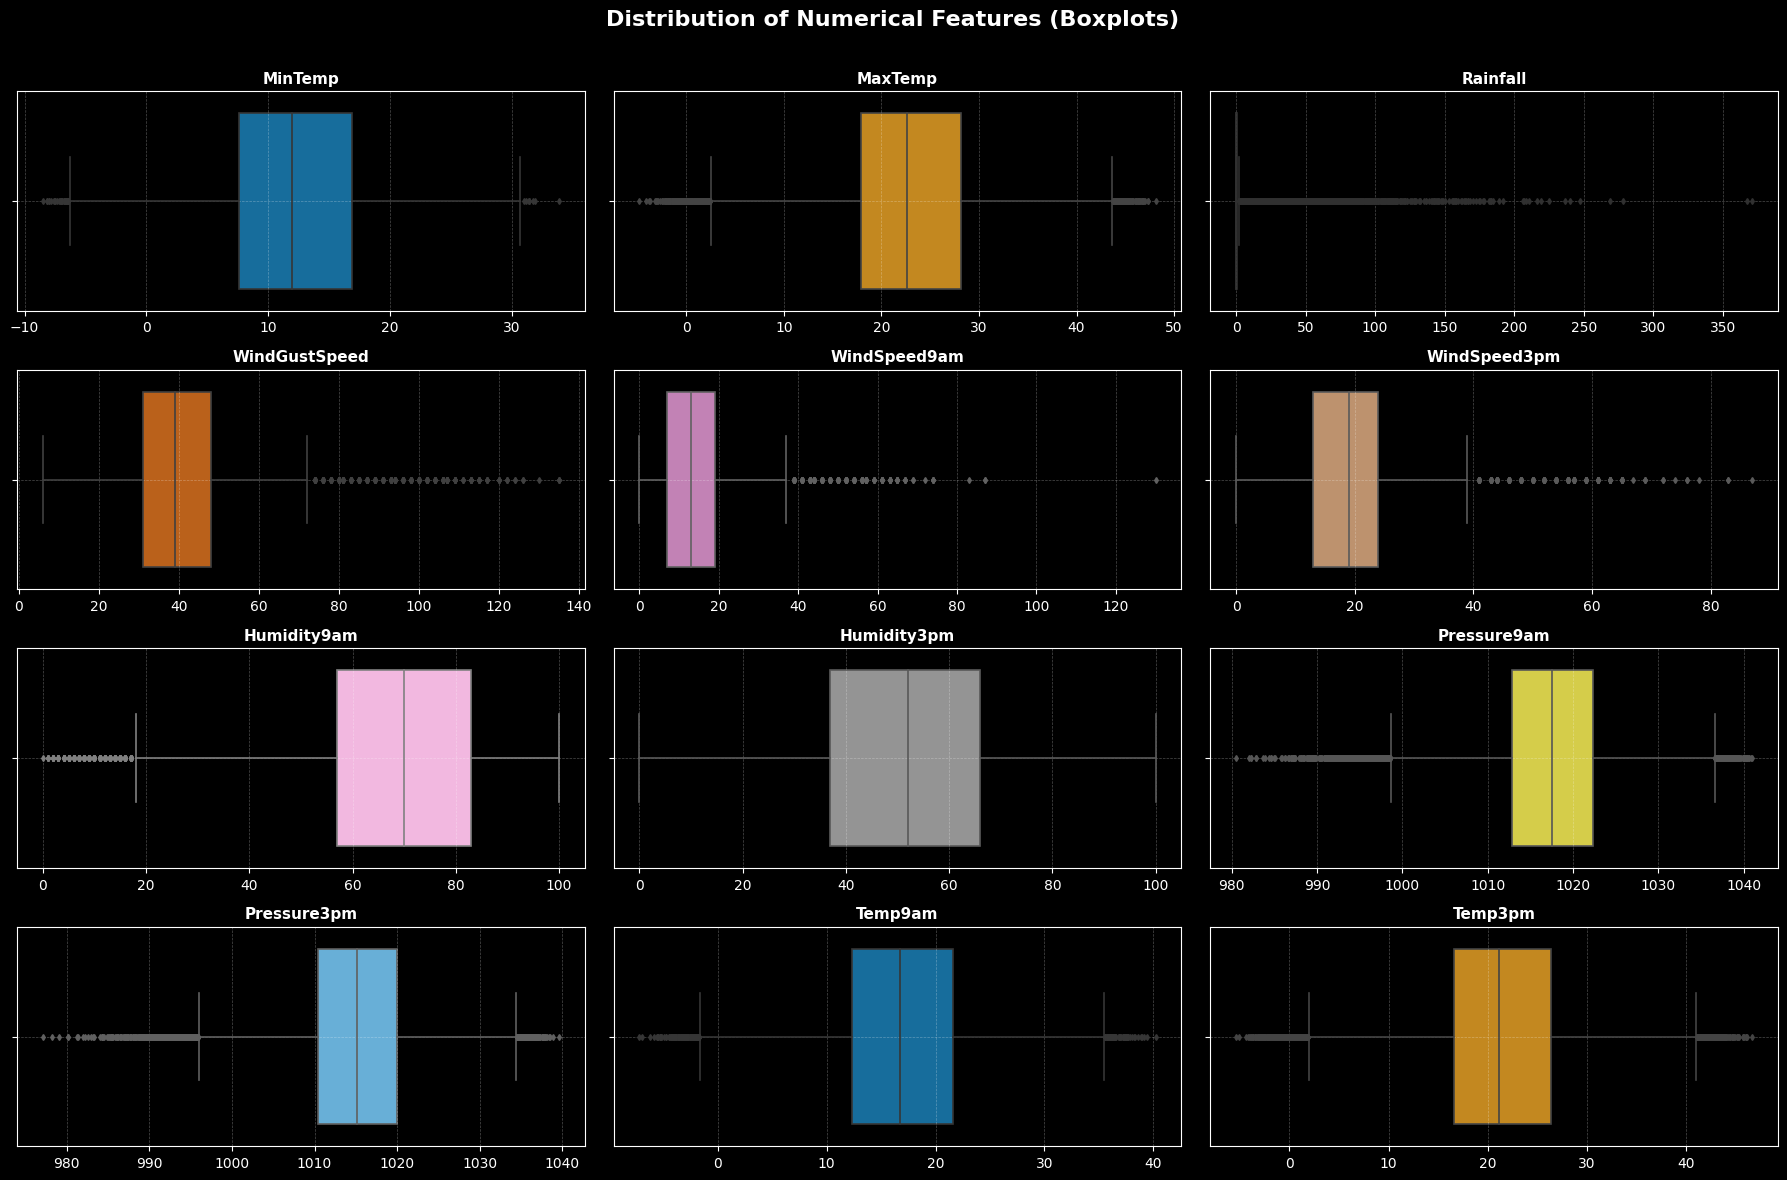

In [39]:
# Apply dark theme
plt.style.use('dark_background')

# Color-blind friendly palette (from ColorBrewer)
palette = sns.color_palette("colorblind")

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Define number of rows/cols for subplots
ncols = 3
nrows = int(np.ceil(len(numeric_cols) / ncols))

# Create figure
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 12))
axes = axes.flatten()

# Create one boxplot per feature
for i, col in enumerate(numeric_cols):
    sns.boxplot(
        x=df[col],
        ax=axes[i],
        color=palette[i % len(palette)],
        fliersize=3,
        linewidth=1.2
    )
    axes[i].set_title(col, fontsize=11, fontweight='bold', color='w')
    axes[i].set_xlabel("")
    axes[i].grid(alpha=0.3, linestyle='--', linewidth=0.5)

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
fig.suptitle("Distribution of Numerical Features (Boxplots)", fontsize=16, fontweight='bold', color='w')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


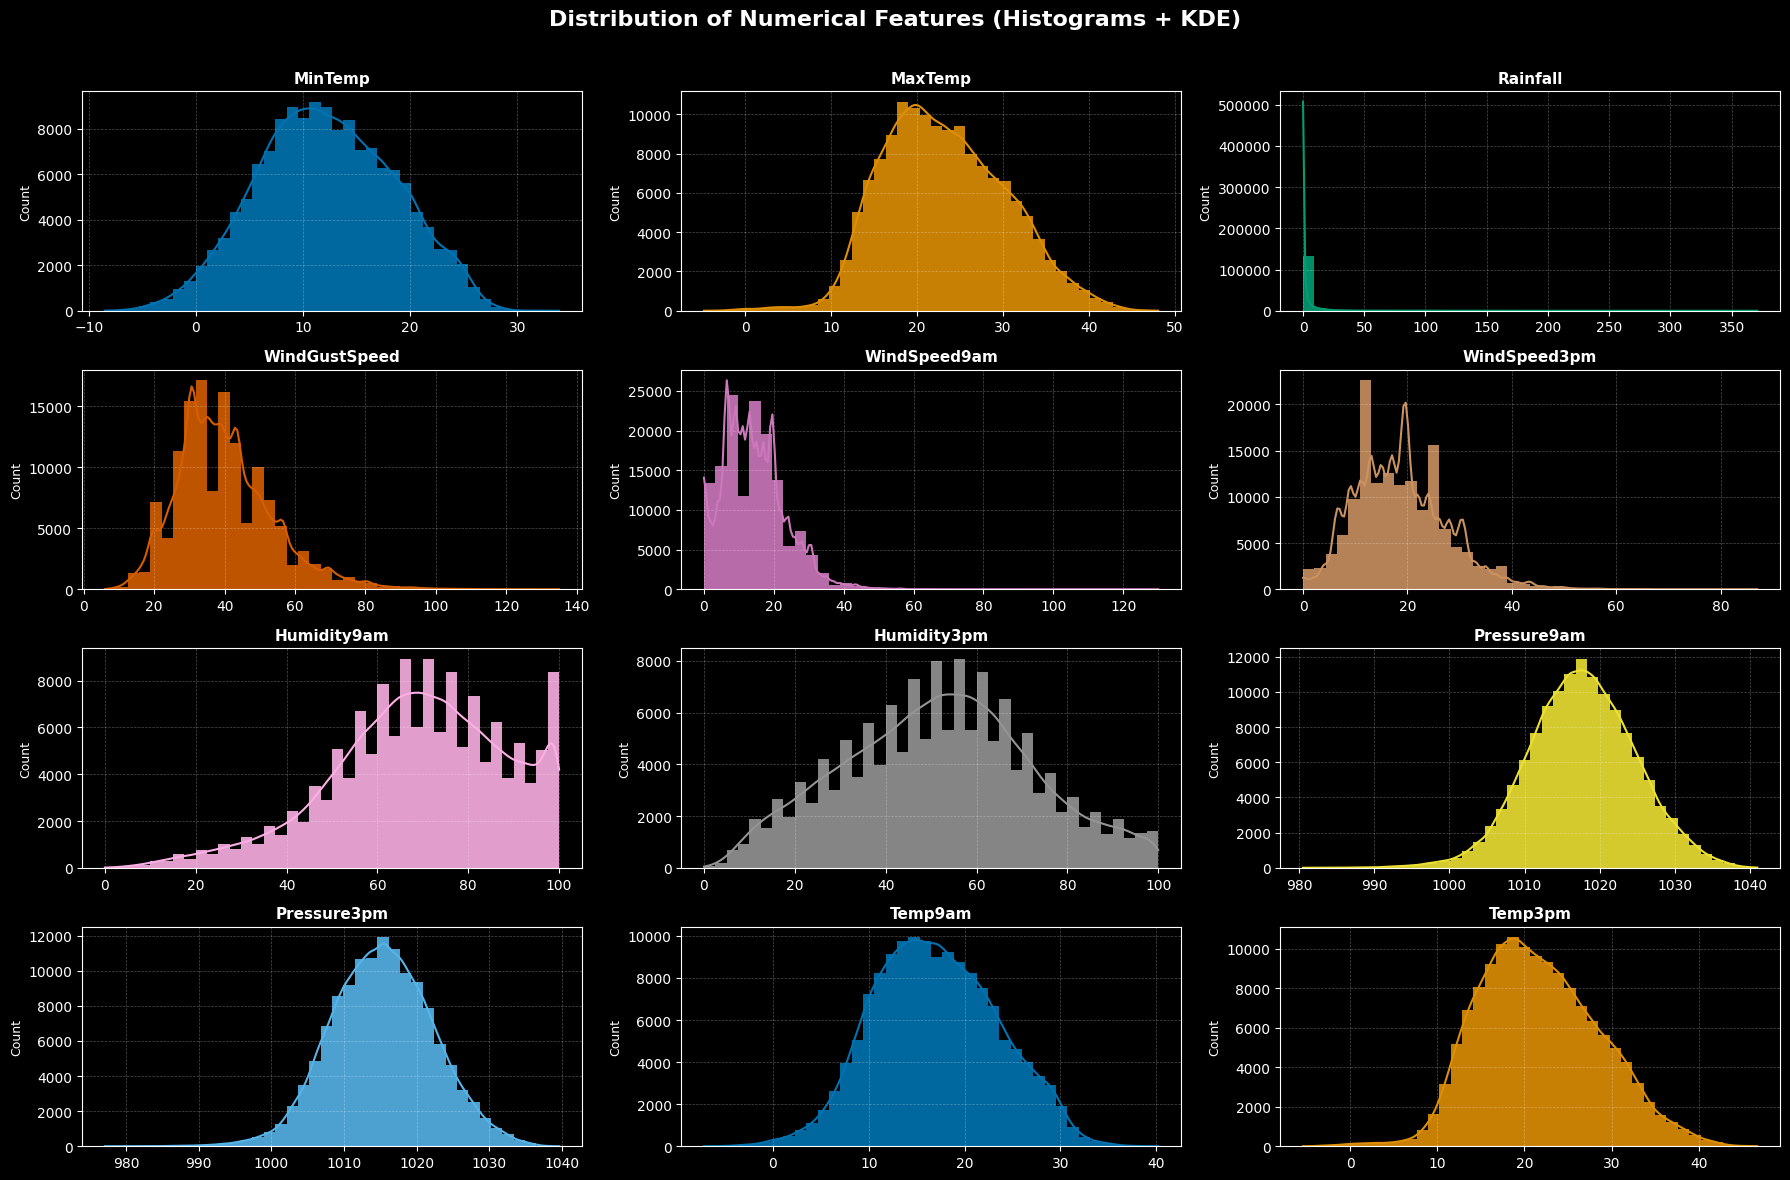

In [40]:
# Dark mode for matplotlib
plt.style.use('dark_background')

# Color-blind friendly palette
palette = sns.color_palette("colorblind")

# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Define subplot layout
ncols = 3
nrows = int(np.ceil(len(numeric_cols) / ncols))

# Create figure
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 12))
axes = axes.flatten()

# Loop through numeric columns
for i, col in enumerate(numeric_cols):
    sns.histplot(
        data=df,
        x=col,
        bins=40,
        kde=True,
        color=palette[i % len(palette)],
        ax=axes[i],
        edgecolor='none',
        alpha=0.9
    )
    axes[i].set_title(col, fontsize=11, fontweight='bold', color='w')
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count", color='w', fontsize=9)
    axes[i].grid(alpha=0.3, linestyle='--', linewidth=0.5)

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and add title
fig.suptitle("Distribution of Numerical Features (Histograms + KDE)", fontsize=16, fontweight='bold', color='w')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


I think, for all of the columns, mean value is good to impute. Let's impute the missing values with mean.

### Impute missing in numerical columns

In [41]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Fill missing numeric values with mean
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].mean())

In [42]:
missing_df = pd.DataFrame({
    'Feature': df.columns,
    'Missing': df.isnull().sum().values,
    'MissingPercent': (df.isnull().sum().values / len(df)) * 100
})

missing_df.sort_values(by = 'MissingPercent', ascending = False)

,Feature,Missing,MissingPercent
7,WindDir9am,10566,7.263853
5,WindGustDir,10326,7.098859
8,WindDir3pm,4228,2.906641
18,RainTomorrow,3267,2.245978
17,RainToday,3261,2.241853
11,Humidity9am,0,0.000000
16,Temp3pm,0,0.000000
15,Temp9am,0,0.000000
14,Pressure3pm,0,0.000000
13,Pressure9am,0,0.000000


I will impute the missing values in the remaining columns as following:

- For `WindDir9am`, `WindGustDir`, `WindDir3pm`, impute the missing by mode (most frequent option)
- For `RainToday` and `RainTomorrow` columns, convert them into 1 and 0, then apply predictive modelling. Fill the nans with predictions.

Note: Before imputing the RainToday and RainTomorrow columns, we need to encode categorical columns by OneHotEncoding. Therefore, I will do this step after encoding. 

In [43]:
for col in ['WindDir9am', 'WindGustDir', 'WindDir3pm']:
    df[col] = df[col].fillna(df[col].mode()[0])

## 3. Scale the numerical variables

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
numerical_cols = df.select_dtypes(include='number').columns

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [60]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,0.189447,-0.045336,-0.210072,W,0.302234,W,WNW,0.672222,0.612323,0.112395,-1.442965,-1.478788,-1.223882,-0.014053,0.017023,No,No
1,2008-12-02,Albury,-0.753101,0.265043,-0.281650,WNW,0.302234,NNW,WSW,-1.133438,0.382874,-1.319609,-1.296417,-1.047782,-1.118839,0.032464,0.381985,No,No
2,2008-12-03,Albury,0.110901,0.349692,-0.281650,WSW,0.454694,W,WSW,0.559368,0.841771,-1.637832,-1.052171,-1.493650,-0.983784,0.621685,0.221402,No,No
3,2008-12-04,Albury,-0.470337,0.674180,-0.281650,NE,-1.222364,SE,E,-0.343462,-1.108541,-1.266572,-1.736061,-0.007422,-0.368534,0.172017,0.703151,No,No
4,2008-12-05,Albury,0.833521,1.280830,-0.162353,W,0.073544,ENE,NW,-0.794877,0.153426,0.695804,-0.905623,-1.018057,-1.388949,0.125499,1.170302,No,No


## 4. Encode the categorical variables

In [63]:
categoric_cols = df.select_dtypes(include = 'object').columns[:-2]
categoric_cols

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

Remove unnecessary columns before encoding

In [64]:
df = df.drop(['Date'], axis = 1)

In [65]:
categoric_cols = df.select_dtypes(include = 'object').columns[:-2]
categoric_cols

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

### Feature importance between categoric columns and categoric target column

In [69]:
import scipy.stats as stats

In [75]:
target = 'RainTomorrow'
features = df.select_dtypes(include = 'object').columns[:-1]
features

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], dtype='object')

In [76]:
results = []

for col in features:
    contingency = pd.crosstab(df[col], df[target])
    chi2, p, dof, ex = stats.chi2_contingency(contingency)
    
    n = contingency.sum().sum()
    phi2 = chi2 / n
    r, k = contingency.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    cramers_v = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
    
    results.append({
        'Feature': col,
        'CramersV': cramers_v,
        'Chi2_pvalue': p
    })

In [77]:
results_df = pd.DataFrame(results).sort_values(by='CramersV', ascending=False)
results_df

,Feature,CramersV,Chi2_pvalue
4,RainToday,0.313066,0.000000e+00
0,Location,0.156818,0.000000e+00
2,WindDir9am,0.114610,0.000000e+00
1,WindGustDir,0.105546,0.000000e+00
3,WindDir3pm,0.091929,4.300747e-250


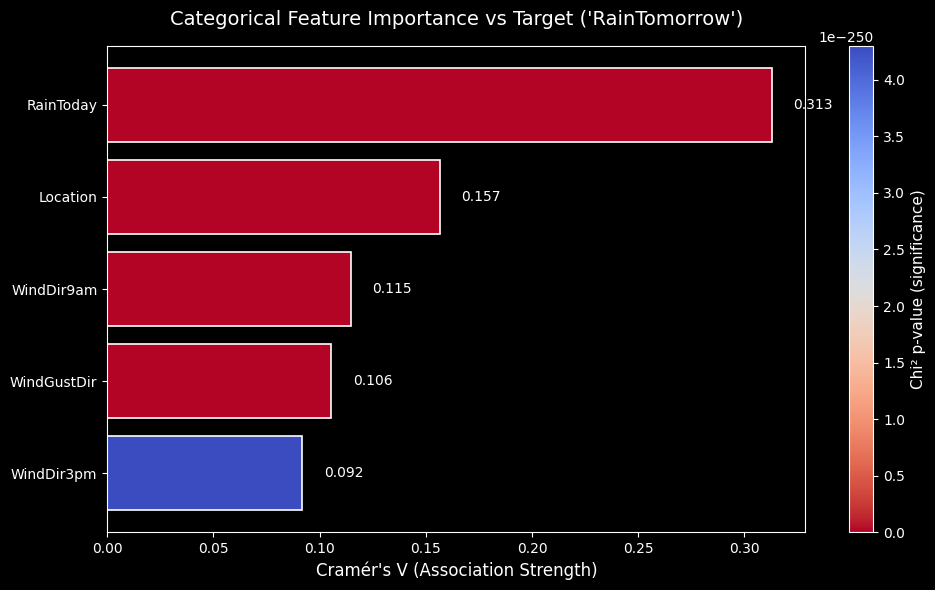

In [78]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(10,6))

# Normalize p-values for color mapping (smaller p = stronger significance)
norm = plt.Normalize(results_df['Chi2_pvalue'].min(), results_df['Chi2_pvalue'].max())
colors = plt.cm.coolwarm_r(norm(results_df['Chi2_pvalue']))

bars = ax.barh(
    results_df['Feature'],
    results_df['CramersV'],
    color=colors,
    edgecolor='white',
    linewidth=1.2
)

ax.set_xlabel("Cramér's V (Association Strength)", fontsize=12)
ax.set_title("Categorical Feature Importance vs Target ('RainTomorrow')", fontsize=14, pad=15)
ax.invert_yaxis()

# Add colorbar for significance
sm = plt.cm.ScalarMappable(cmap='coolwarm_r', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Chi² p-value (significance)', fontsize=11)

# Annotate bars
for bar, v in zip(bars, results_df['CramersV']):
    ax.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
            f"{v:.3f}", va='center', fontsize=10)

plt.tight_layout()
plt.show()


According to the results, we can tell that all categoric columns are signifcant, therefore, we need to encode them all.

### OneHotEncoding of categoric columnsfrom sklearn.preprocessing import OneHotEncoder

In [79]:
from sklearn.preprocessing import OneHotEncoder

In [81]:
categoric_cols = df.select_dtypes(include = 'object').columns[:-1]
categoric_cols

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], dtype='object')

In [82]:
# Initialize encoder
encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')

In [84]:
# Fit and transform categorical columns
encoded_array = encoder.fit_transform(df[categoric_cols])


In [86]:
# Create a DataFrame for encoded columns
encoded_cols = encoder.get_feature_names_out(categoric_cols)
encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols, index=df.index)

In [88]:
# Drop original categorical columns and concatenate encoded ones
df.drop(columns=categoric_cols, inplace=True)
df = pd.concat([df, encoded_df], axis=1)

In [89]:
# Convert target variable to numeric (0/1)
df['RainTomorrow'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1})

In [91]:
df = df.drop(['RainToday_nan'], axis=1)

In [93]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm',
       ...
       'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE',
       'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W', 'WindDir3pm_WNW',
       'WindDir3pm_WSW', 'RainToday_Yes'],
      dtype='object', length=107)

In [96]:
df['RainTomorrow'].unique()

array([0., 1.])

In [95]:
df = df.dropna(subset=['RainTomorrow'])

In [97]:
df

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
0,0.189447,-0.045336,-0.210072,0.302234,0.672222,0.612323,0.112395,-1.442965,-1.478788,-1.223882,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.753101,0.265043,-0.281650,0.302234,-1.133438,0.382874,-1.319609,-1.296417,-1.047782,-1.118839,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.110901,0.349692,-0.281650,0.454694,0.559368,0.841771,-1.637832,-1.052171,-1.493650,-0.983784,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.470337,0.674180,-0.281650,-1.222364,-0.343462,-1.108541,-1.266572,-1.736061,-0.007422,-0.368534,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.833521,1.280830,-0.162353,0.073544,-0.794877,0.153426,0.695804,-0.905623,-1.018057,-1.388949,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,-1.365757,-0.200526,-0.281650,-0.688755,0.107953,-0.649644,-0.524051,-1.198719,1.047800,0.891980,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145455,-1.475720,0.025204,-0.281650,-0.688755,-0.117754,-0.879093,-0.948349,-1.345267,1.032937,0.756925,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145456,-1.350047,0.293259,-0.281650,-1.374824,-0.117754,-1.108541,-0.683163,-1.491815,0.869452,0.576852,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145457,-1.067283,0.518990,-0.281650,-0.231375,-0.569169,-1.108541,-0.842274,-1.345267,0.497895,0.231711,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [98]:
df.columns.tolist()

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm',
 'RainTomorrow',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_SalmonGu

## 5. Neural Networks model

In [99]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [100]:
X = df.drop(columns=['RainTomorrow']).values
y = df['RainTomorrow'].values

In [101]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [102]:
# Convert numpy arrays to torch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [103]:
input_size = X_train.shape[1]
hidden1 = 128
hidden2 = 64
output_size = 1

class RainPredictor(nn.Module):
    def __init__(self, input_size, hidden1, hidden2, output_size):
        super(RainPredictor, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1)
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.fc3 = nn.Linear(hidden2, output_size)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

model = RainPredictor(input_size, hidden1, hidden2, output_size)


In [104]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [105]:
epochs = 100
for epoch in range(epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.5875
Epoch [20/100], Loss: 0.4885
Epoch [30/100], Loss: 0.4246
Epoch [40/100], Loss: 0.3936
Epoch [50/100], Loss: 0.3821
Epoch [60/100], Loss: 0.3722
Epoch [70/100], Loss: 0.3645
Epoch [80/100], Loss: 0.3586
Epoch [90/100], Loss: 0.3537
Epoch [100/100], Loss: 0.3493


In [106]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    y_pred_class = (y_pred >= 0.5).float()
    
acc = accuracy_score(y_test, y_pred_class)
prec = precision_score(y_test, y_pred_class)
rec = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
roc = roc_auc_score(y_test, y_pred)

print("Evaluation Metrics:")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC AUC  : {roc:.4f}")


Evaluation Metrics:
Accuracy : 0.8511
Precision: 0.7353
Recall   : 0.5247
F1-score : 0.6124
ROC AUC  : 0.8725


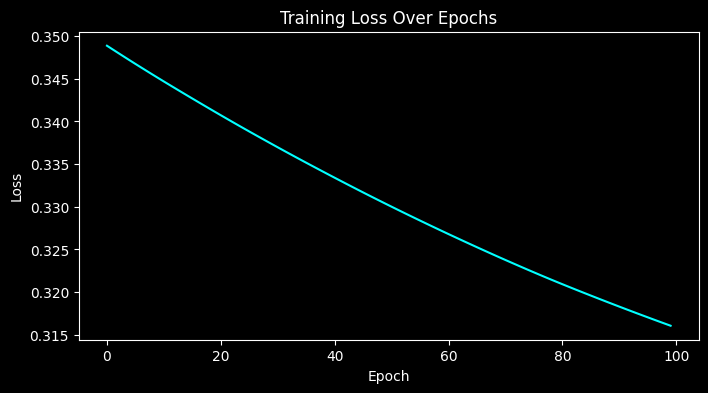

In [107]:
losses = []
for epoch in range(epochs):
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.figure(figsize=(8,4))
plt.plot(losses, color='cyan')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [108]:
# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    y_pred_class = (y_pred >= 0.5).float()

# Calculate metrics
metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_class),
    'Precision': precision_score(y_test, y_pred_class),
    'Recall': recall_score(y_test, y_pred_class),
    'F1-score': f1_score(y_test, y_pred_class),
    'ROC AUC': roc_auc_score(y_test, y_pred)
}

# Convert to DataFrame
metrics_df = pd.DataFrame.from_dict(metrics, orient='index', columns=['Value'])
metrics_df

,Value
Accuracy,0.861528
Precision,0.755183
Recall,0.565647
F1-score,0.646816
ROC AUC,0.892176


<font color = 'steelblue'><b>Accuracy (0.862) </b></font> – The model correctly predicts 86.2% of all days. Overall performance looks good, but accuracy alone may be misleading if classes are imbalanced.

<font color = 'steelblue'><b>Precision (0.755) </b></font> – When the model predicts rain, it is correct 75.5% of the time. Positive predictions are fairly reliable.

<font color = 'steelblue'><b>Recall (0.566) </b></font> – Of all actual rainy days, the model correctly identifies 56.6%. Many rainy days are missed, indicating lower sensitivity.

<font color = 'steelblue'><b>F1-score (0.647) </b></font> – The harmonic mean of precision and recall. Shows moderate performance in predicting rain.

<font color = 'steelblue'><b>ROC AUC (0.892) </b></font> – The model can distinguish rainy vs non-rainy days well. A value near 0.9 indicates strong discriminative ability.